Read image from folder

In [34]:

import cv2 as cv
import os
import glob

folder_path = r'"D:\Books\6th Semester\image lab\Lab-01\Images 25"'
image_files = glob.glob(os.path.join(folder_path, '*.jpg'))
images = []

for image_path in image_files:
    img = cv.imread(image_path)
    if img is not None:
        images.append(img)
    else:
        print(f"Error reading image: {image_path}")

#print(f"Read {len(images)} images from the folder.")



Resized images from a folder and then save those images in new folder. 

In [35]:
import cv2
import os
import glob

# Specify the input folder containing images
input_folder = r"D:\Books\6th Semester\image lab\Lab-01\Images 25"

# Create a new folder for resized images
output_folder = r"D:\Books\6th Semester\image lab\Lab-01\resized"
os.makedirs(output_folder, exist_ok=True)

# Define the desired dimensions for resizing
new_width, new_height = 500, 500

# Loop over existing images and resize
for filename in glob.glob(os.path.join(input_folder, '*.jpg')):
    img = cv2.imread(filename)
    resized_image = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)
    
    # Save resized images to the output folder
    output_filename = os.path.join(output_folder, os.path.basename(filename))
    cv2.imwrite(output_filename, resized_image)

print(f"Resized images saved in '{output_folder}' successfully!")


Resized images saved in 'D:\Books\6th Semester\image lab\Lab-01\resized' successfully!


Coloure Transformation of Images

In [40]:
import cv2 as cv
import os
import glob

input_folder = r"D:\Books\6th Semester\image lab\Lab-01\Images 25"
output_folder = r"D:\Books\6th Semester\image lab\Lab-01\Color Transform"

os.makedirs(output_folder, exist_ok=True)

for image_file in glob.glob(os.path.join(input_folder, '*.jpg')):
    img = cv.imread(image_file)

    gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    #hsv_image = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    #hls_image = cv.cvtColor(img, cv.COLOR_BGR2HLS)
    output_filename = os.path.join(output_folder, os.path.basename(image_file))
    cv.imwrite(output_filename, gray_image)

print(f"Transformed images saved in '{output_folder}' successfully!")


Transformed images saved in 'D:\Books\6th Semester\image lab\Lab-01\Color Transform' successfully!


Low Pass and High Pass filter 

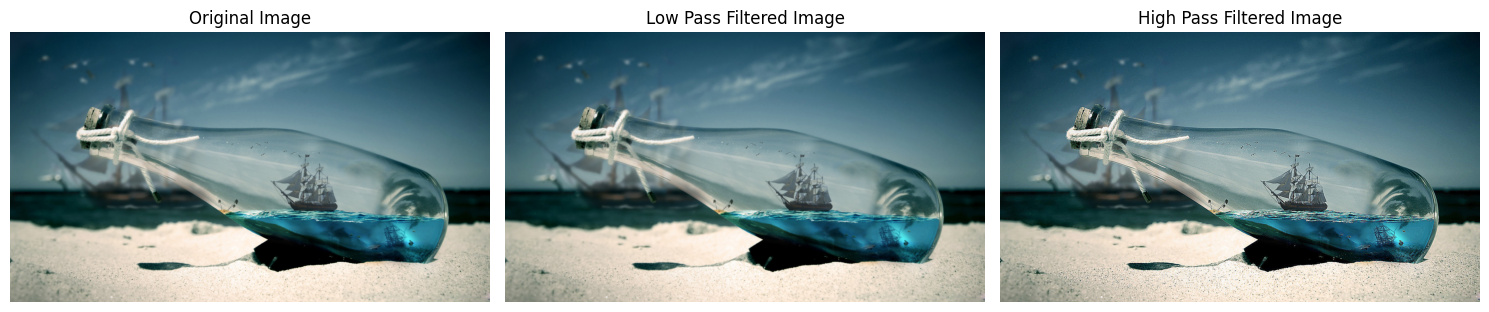

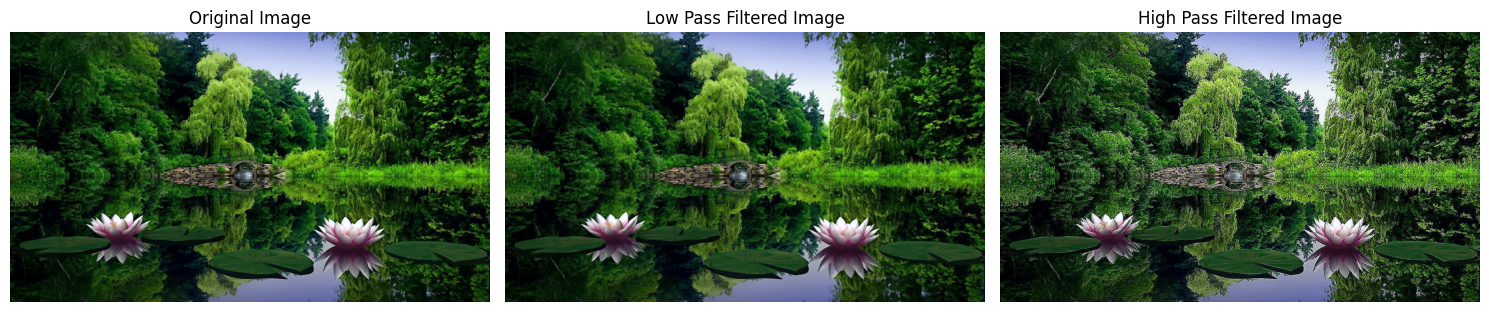

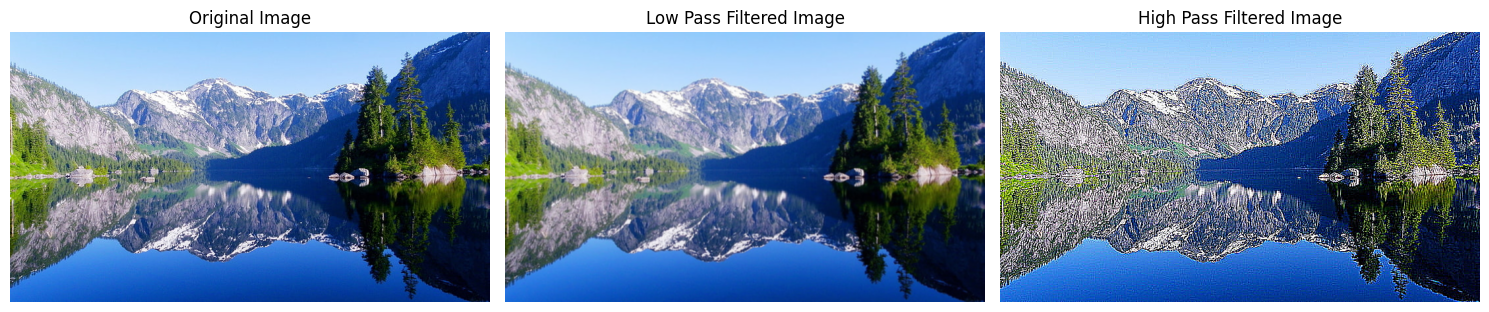

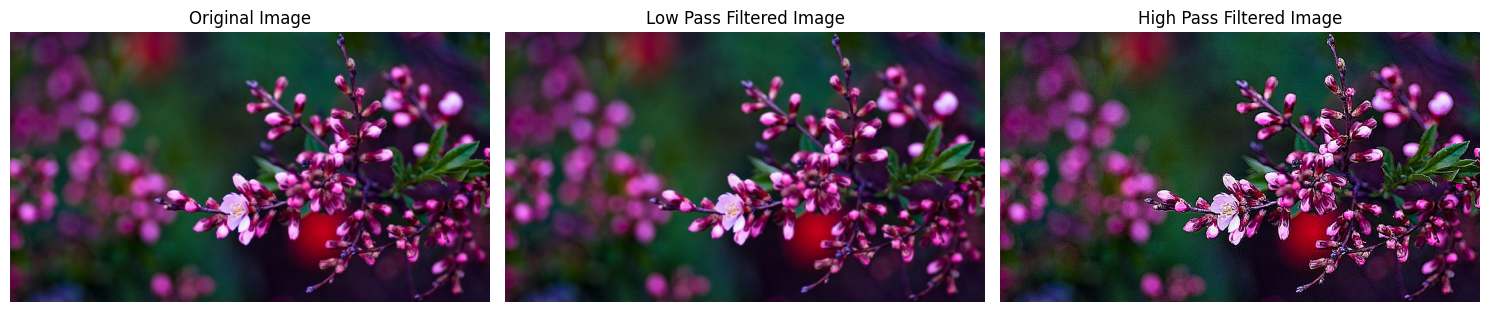

In [9]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Path to the folder containing images
folder_path = r"D:\Books\6th Semester\image lab\image 4"

# List all files in the folder
image_files = os.listdir(folder_path)

# Create directories to save filtered images
lowpass_folder = os.path.join(folder_path, "lowpass")
highpass_folder = os.path.join(folder_path, "highpass")
os.makedirs(lowpass_folder, exist_ok=True)
os.makedirs(highpass_folder, exist_ok=True)

# Iterate over each image file
for image_file in image_files:
    # Construct the full path to the image file
    image_path = os.path.join(folder_path, image_file)
    
    # Read the image in grayscale mode
    inputImage = cv2.imread(image_path)
    
    # Low pass filter
    lowPass = cv2.GaussianBlur(inputImage, (3, 3), 0)

    # High pass filter
    kernal = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    highPass = cv2.filter2D(inputImage, -1, kernal)

    # Plotting
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    axes[0].imshow(cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(lowPass, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Low Pass Filtered Image')
    axes[1].axis('off')

    axes[2].imshow(cv2.cvtColor(highPass, cv2.COLOR_BGR2RGB))
    axes[2].set_title('High Pass Filtered Image')
    axes[2].axis('off')

    # Save low pass filtered image
    lowpass_image_path = os.path.join(lowpass_folder, "lowpass_" + image_file)
    cv2.imwrite(lowpass_image_path, lowPass)
    
    # Save high pass filtered image
    highpass_image_path = os.path.join(highpass_folder, "highpass_" + image_file)
    cv2.imwrite(highpass_image_path, highPass)

    plt.tight_layout()
    plt.show()


Gaussian and Laplace Filter 

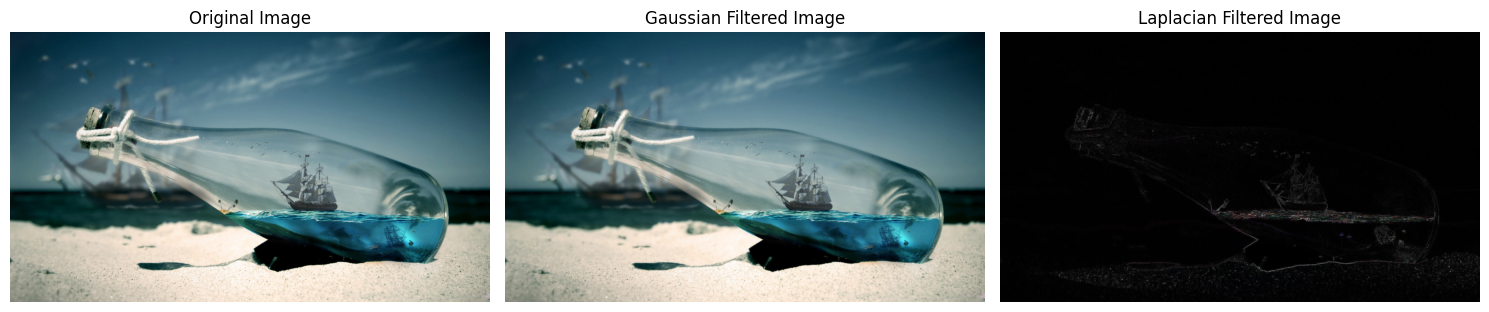

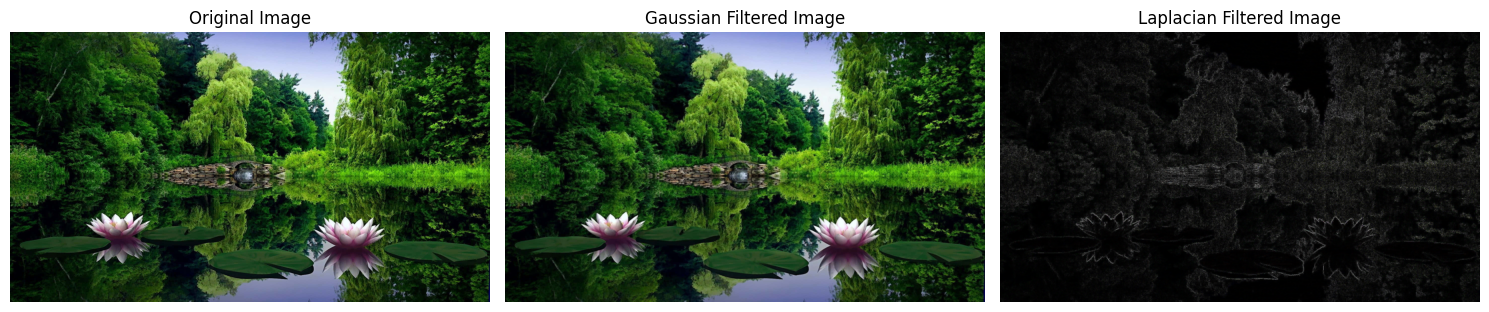

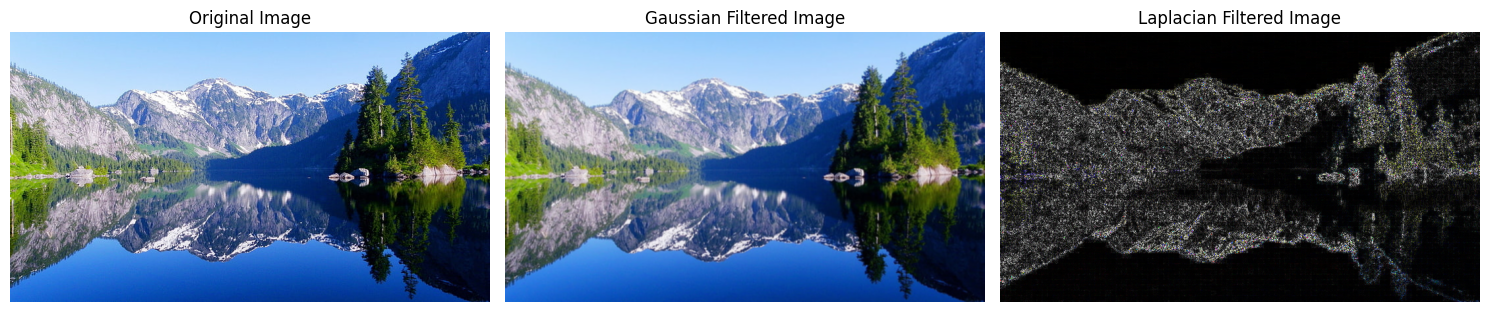

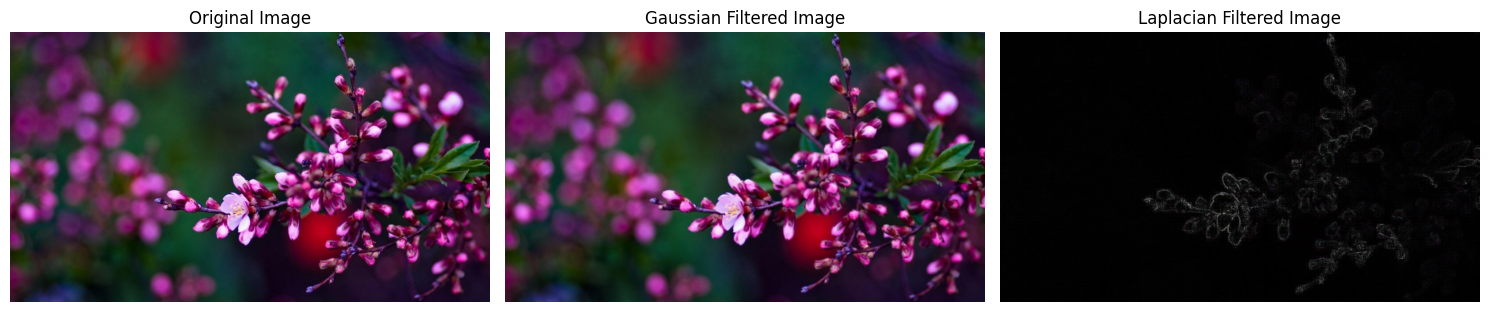

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'cv::GaussianBlur'


In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing images
folder_path = r"D:\Books\6th Semester\image lab\image 4"

# List all files in the folder
image_files = os.listdir(folder_path)

# Create directories to save filtered images
gaussian_folder = os.path.join(folder_path, "gaussian")
laplacian_folder = os.path.join(folder_path, "laplacian")
os.makedirs(gaussian_folder, exist_ok=True)
os.makedirs(laplacian_folder, exist_ok=True)

# Iterate over each image file
for image_file in image_files:
    # Construct the full path to the image file
    image_path = os.path.join(folder_path, image_file)
    
    # Read the image
    inputImage = cv2.imread(image_path)
    
    # Apply Gaussian filter
    gaussian = cv2.GaussianBlur(inputImage, (3, 3), 0)
    
    # Save Gaussian filtered image
    gaussian_image_path = os.path.join(gaussian_folder, "gaussian_" + image_file)
    cv2.imwrite(gaussian_image_path, gaussian)
    
    # Apply Laplacian filter
    laplacian = cv2.Laplacian(inputImage, cv2.CV_64F)
    laplacian = np.uint8(np.absolute(laplacian))
    
    # Save Laplacian filtered image
    laplacian_image_path = os.path.join(laplacian_folder, "laplacian_" + image_file)
    cv2.imwrite(laplacian_image_path, laplacian)
    
    # Plot original, Gaussian filtered, and Laplacian filtered images
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    
    axes[0].imshow(cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Gaussian Filtered Image')
    axes[1].axis('off')
    
    axes[2].imshow(cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Laplacian Filtered Image')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()


Median and Box Filter

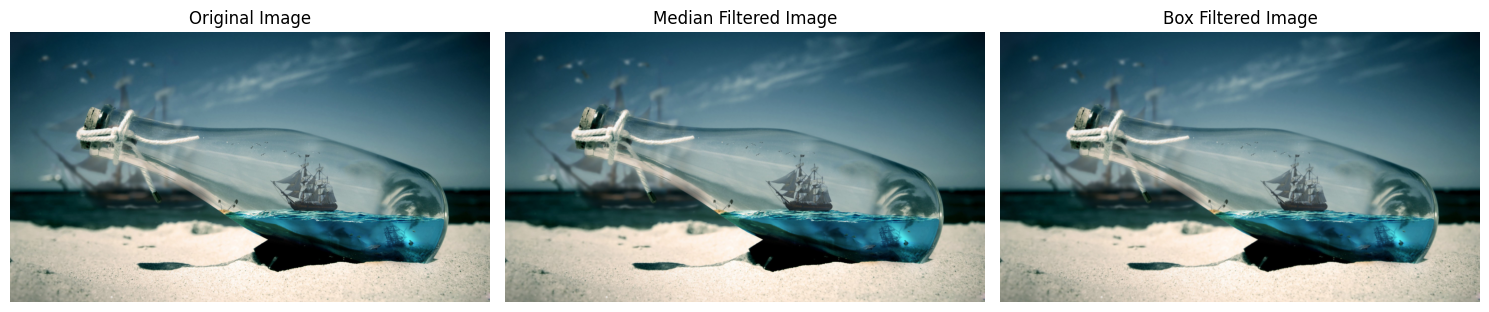

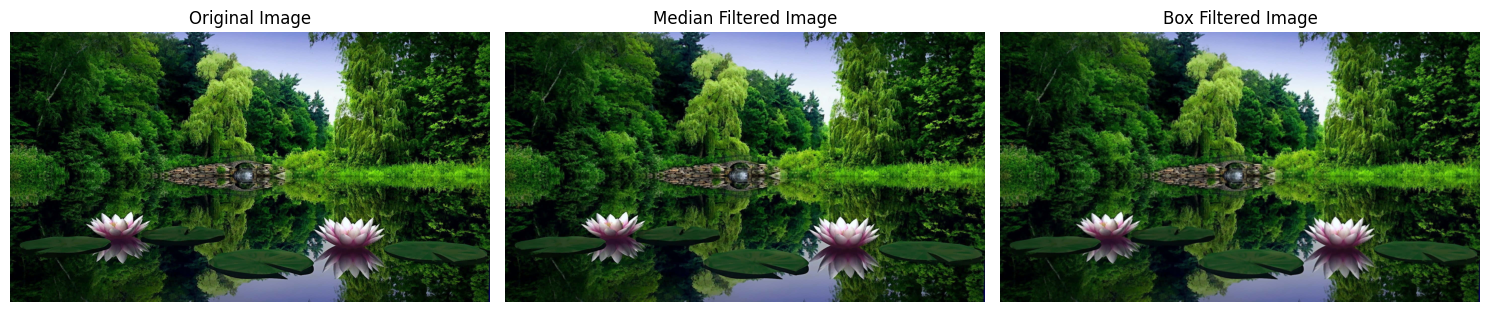

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\median_blur.dispatch.cpp:283: error: (-215:Assertion failed) !_src0.empty() in function 'cv::medianBlur'


In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing images
folder_path = r"D:\Books\6th Semester\image lab\image 4"

# List all files in the folder
image_files = os.listdir(folder_path)

# Create directories to save filtered images
median_folder = os.path.join(folder_path, "median")
box_folder = os.path.join(folder_path, "box")
os.makedirs(median_folder, exist_ok=True)
os.makedirs(box_folder, exist_ok=True)

# Iterate over each image file
for image_file in image_files:
    # Construct the full path to the image file
    image_path = os.path.join(folder_path, image_file)
    
    # Read the image
    inputImage = cv2.imread(image_path)
    
    # Apply Median filter
    median = cv2.medianBlur(inputImage, 3)
    
    # Save Median filtered image
    median_image_path = os.path.join(median_folder, "median_" + image_file)
    cv2.imwrite(median_image_path, median)
    
    # Apply Box filter
    box = cv2.boxFilter(inputImage, -1, (3, 3))
    
    # Save Box filtered image
    box_image_path = os.path.join(box_folder, "box_" + image_file)
    cv2.imwrite(box_image_path, box)
    
    # Plot original, Median filtered, and Box filtered images
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    
    axes[0].imshow(cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Median Filtered Image')
    axes[1].axis('off')
    
    axes[2].imshow(cv2.cvtColor(box, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Box Filtered Image')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()
